In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pyts.decomposition import SingularSpectrumAnalysis
import matplotlib.pyplot as plt

In [29]:
from google.colab import drive 
import pandas as pd
drive.mount('/content/gdrive', force_remount=True)
df=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/PTDL KD/Dataset/Dữ liệu Lịch sử PLC.csv")
df

Mounted at /content/gdrive


,Date,Price,Open,High,Low,Volume,%Change
0,28/04/2023,"31,400.00","31,300.00","31,900.00","31,300.00",321.71K,-0.63%
1,27/04/2023,"31,600.00","31,400.00","31,900.00","31,400.00",292.75K,0.64%
2,26/04/2023,"31,400.00","31,000.00","31,500.00","30,700.00",372.70K,0.96%
3,25/04/2023,"31,100.00","32,000.00","32,000.00","31,000.00",550.28K,-2.20%
4,24/04/2023,"31,800.00","31,500.00","32,400.00","31,300.00",371.52K,0.95%
...,...,...,...,...,...,...,...
1541,9/1/2017,"21,739.00","22,575.00","22,575.00","21,739.00",1.11K,-0.76%
1542,6/1/2017,"21,906.00","21,739.00","22,575.00","21,739.00",2.21K,-1.13%
1543,5/1/2017,"22,157.00","21,739.00","22,157.00","21,739.00",1.50K,0.00%
1544,4/1/2017,"22,157.00","22,324.00","22,324.00","22,157.00",0.66K,-0.75%


In [30]:
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return int(volume_str)

# Áp dụng hàm chuyển đổi cho cột "Vol."
df["Volume"] = df["Volume"].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
df["%Change"] = df["%Change"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
df['Price'] = df['Price'].apply(convert_str_to_number)
df['Open'] = df['Open'].apply(convert_str_to_number)
df['High'] = df['High'].apply(convert_str_to_number)
df['Low'] = df['Low'].apply(convert_str_to_number)

df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-30-b63843856899>:33: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [31]:
pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import subprocess

# Clone the PyTS repository
subprocess.run(['git', 'clone', 'https://github.com/johannfaouzi/pyts/tree/main/pyts'])

# Install the PyTS package
subprocess.run(['pip', 'install', '.'])


CompletedProcess(args=['pip', 'install', '.'], returncode=1)

In [47]:
# Extract the "Price" column and convert it to a NumPy array
price = np.array(df['Price'])

n = len(price)

In [54]:
# Phân chia dữ liệu thành các tập train, test và validate
train_size = 0.7
test_size = 0.2
val_size = 0.1
train, test_val = train_test_split(price, train_size=train_size, test_size=test_size+val_size, shuffle=False)
test, val = train_test_split(test_val, train_size=test_size/(test_size+val_size), shuffle=False)


In [63]:
train = train.reshape(1, -1)

# Thực hiện SSA trên tập train
window_size = 60
ss = SingularSpectrumAnalysis(window_size=window_size)
X_train = ss.fit_transform(train)



In [67]:
# Thực hiện dự đoán trên tập test
X_test = ss.transform
# Tính toán giá trị dự đoán trên tập test


window_size = 60
ss = SingularSpectrumAnalysis(window_size=window_size)
X_test = ss.fit_transform(train)


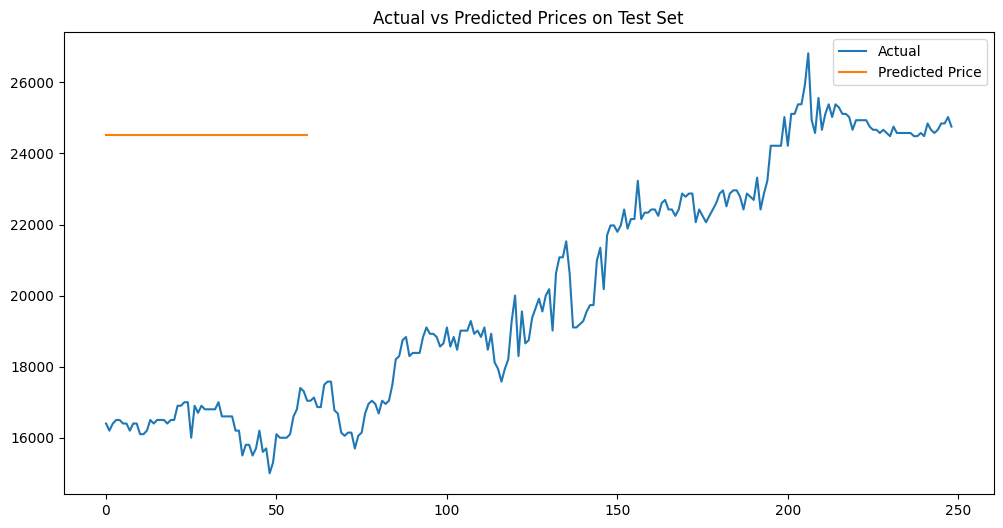

In [79]:
plt.figure(figsize=(12, 6))

# Tính toán giá trị thực tế trên tập test
y_test = test[window_size:]
X_test_pred = np.zeros((X_test.shape[0], window_size))
# Lấy giá trị dự đoán đầu tiên và trung bình cộng của giá trị cuối cùng của tập train
y_test_pred = X_test_pred[:, 0] + np.mean(train[-window_size:])
plt.plot( y_test, label='Actual')
plt.plot( y_test_pred, label="Predicted Price")
plt.legend()
plt.title("Actual vs Predicted Prices on Test Set")
plt.show()